In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

In [4]:
# Ten classes (numbers 0 to 9)
num_classes = 10

# The images are 28x28 pixels, and have one channel (grayscale). 
# For color images, the last number here would be 3 (red/green/blue channel).
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape)

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


(60000, 28, 28)
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


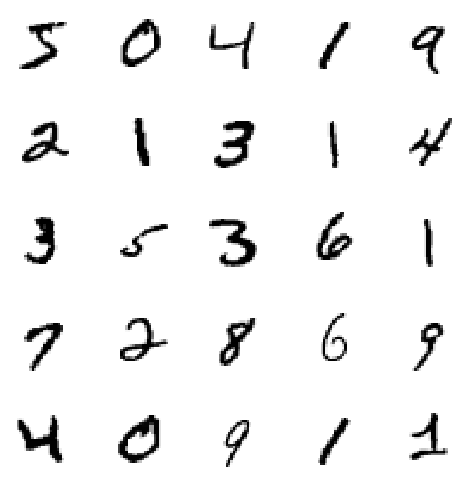

In [5]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [6]:
ff_network = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

ff_network.summary()

/opt/anaconda3/envs/dat255/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
ff_network.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
batch_size = 128    # How many images to load in a single batch
epochs = 10         # How many times to iterate over the full dataset

ff_network.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.5255 - val_accuracy: 0.9418 - val_loss: 0.2030
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 0.2206 - val_accuracy: 0.9555 - val_loss: 0.1554
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9488 - loss: 0.1752 - val_accuracy: 0.9607 - val_loss: 0.1416
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.9559 - loss: 0.1494 - val_accuracy: 0.9658 - val_loss: 0.1223
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9609 - loss: 0.1324 - val_accuracy: 0.9658 - val_loss: 0.1185
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9655 - loss: 0.1177 - val_accuracy: 0.9667 - val_loss: 0.1127
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9684 - loss: 0.1069 - val_accuracy: 0.9693 - val_loss: 0.1070
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9709 - loss: 0.0990 - val_accu

In [9]:
score = ff_network.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.13042162358760834
Test accuracy: 0.9613000154495239


In [10]:
convnet = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

convnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,578 (68.66 KB)

 Trainable params: 17,578 (68.66 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
convnet.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

convnet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8686 - loss: 0.4307 - val_accuracy: 0.9748 - val_loss: 0.0966
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9573 - loss: 0.1375 - val_accuracy: 0.9807 - val_loss: 0.0685
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9685 - loss: 0.1010 - val_accuracy: 0.9852 - val_loss: 0.0551
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9731 - loss: 0.0861 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9769 - loss: 0.0755 - val_accuracy: 0.9868 - val_loss: 0.0464
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9794 - loss: 0.0684 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9807 - loss: 0.0618 - val_accuracy: 0.9898 - val_loss: 0.0387
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9812 - loss: 0.0589 - val_accu

In [12]:
score = convnet.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.030567949637770653
Test accuracy: 0.9897000193595886
